In [120]:
from numpy.linalg import pinv, norm, solve, lstsq
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
S, R = make_regression(n_samples=10000, n_features=10, n_informative=10, noise=50.0, random_state=1)
S, S_test, R, R_test = train_test_split(S, R)

In [147]:
w = pinv(S) @ R
R_pred = S@w
print(r2_score(R, R_pred))
print(mean_squared_error(R, R_pred))

# w = lstsq(S, R, rcond=-1)[0]
# R_pred = S@w
# print(r2_score(R, R_pred), )
# print(mean_squared_error(R, R_pred))

R_pred = S_test@w
print(r2_score(R_test, R_pred))
print(mean_squared_error(R_test, R_pred))

0.9414242614581239
2505.5392162728995
0.9430241543330049
2431.8409658166206


In [136]:
class Agent:
    def __init__(self, method='random'):
        self.H = None #states
        self.R = [] # rewards for self.H - used for fit
        self.w = None # Q-function weights
        self.method = method
        
#       todo: add fit_flag
        
    def choose_phi(self, Phi, R, method=None, update_H=True):
        if method is None:
            method = self.method
        if self.H is None:
            method = 'random'
            
        if method == 'random':
            ind = np.random.randint(Phi.shape[0], size=1)
        elif method == 'stat_volume':
            H_pinv = pinv(self.H)
#             print([norm(H_pinv.T@phi) for phi in Phi])
            ind = np.argmax([norm(H_pinv.T@phi) for phi in Phi])
            
        phi = Phi[ind]
        r = R[ind]
            
        if update_H:
            self.update_H(phi)
            self.R += [r]
        return phi, r
    
    def update_H(self, phi):
        if self.H is None:
            self.H = phi
        else:
            self.H = np.vstack([self.H, phi])
    def fit(self):
        self.w = pinv(self.H) @ self.R
    def predict(self, S):
        return S@self.w
    def evaluate(self, S=S_test, R=R_test):
        R_pred = self.predict(S)
        r2 = r2_score(R, R_pred)
        mse = mean_squared_error(R, R_pred)
#         print('r2_score', r2)
#         print('mse', mse)
        return r2, mse
        

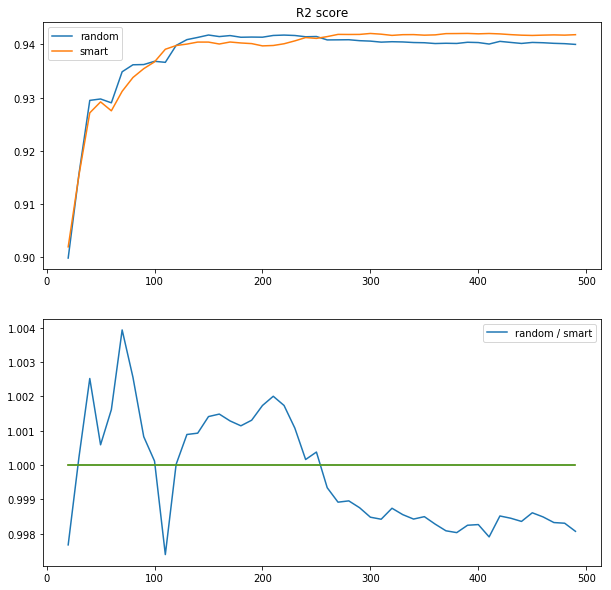

In [140]:
smart_agent = Agent('stat_volume')
random_agent = Agent('random')

agents = {'random': random_agent,
            'smart': smart_agent,
         }

scores = pd.DataFrame()
for i in range(500):
    ind = np.random.randint(S.shape[0], size=4)
    for agent_name, agent in agents.items():
#         print(i, agent_name)
        phi, r = agent.choose_phi(S[ind], R[ind])
        if i > 10 and i%10 == 0:
            agent.fit()
            r2, mse = agent.evaluate(S_test, R_test)
            scores.at[i, agent_name] = r2
scores
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
for agent_name in agents:
    ax[0].plot(scores[agent_name], label=agent_name)
ax[0].set_title('R2 score')
ax[0].legend()

ax[1].plot(scores['random'] / scores['smart'], label = 'random / smart')    
ax[1].plot(scores*0 + 1)   
# ax[0].title('R2 score')
ax[1].legend()
plt.show()

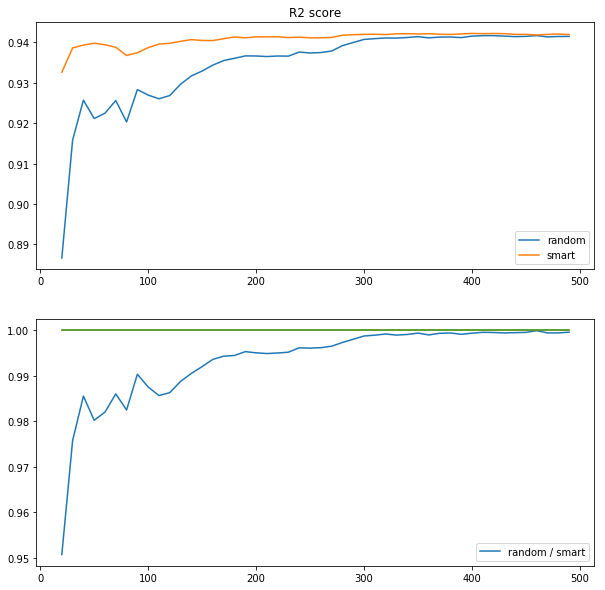

In [141]:
smart_agent = Agent('stat_volume')
random_agent = Agent('random')

agents = {'random': random_agent,
            'smart': smart_agent,
         }

scores = pd.DataFrame()
for i in range(500):
    ind = np.random.randint(S.shape[0], size=4)
    for agent_name, agent in agents.items():
#         print(i, agent_name)
        phi, r = agent.choose_phi(S[ind], R[ind])
        if i > 10 and i%10 == 0:
            agent.fit()
            r2, mse = agent.evaluate(S_test, R_test)
            scores.at[i, agent_name] = r2
scores
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
for agent_name in agents:
    ax[0].plot(scores[agent_name], label=agent_name)
ax[0].set_title('R2 score')
ax[0].legend()

ax[1].plot(scores['random'] / scores['smart'], label = 'random / smart')    
ax[1].plot(scores*0 + 1)   
# ax[0].title('R2 score')
ax[1].legend()
plt.show()

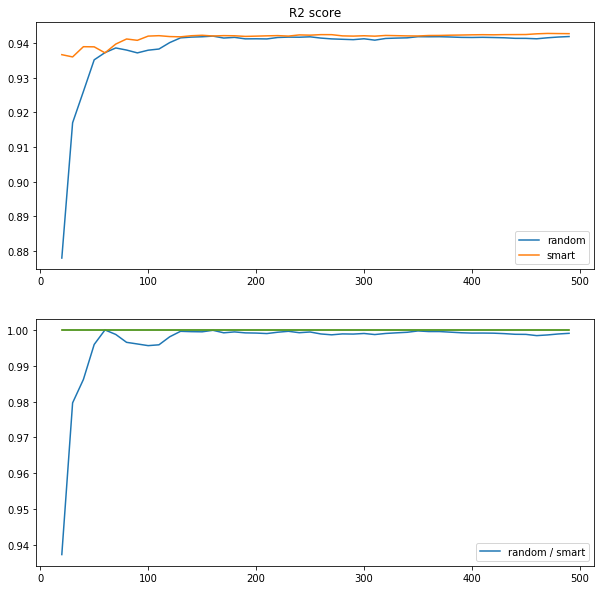

In [142]:
smart_agent = Agent('stat_volume')
random_agent = Agent('random')

agents = {'random': random_agent,
            'smart': smart_agent,
         }

scores = pd.DataFrame()
for i in range(500):
    ind = np.random.randint(S.shape[0], size=4)
    for agent_name, agent in agents.items():
#         print(i, agent_name)
        phi, r = agent.choose_phi(S[ind], R[ind])
        if i > 10 and i%10 == 0:
            agent.fit()
            r2, mse = agent.evaluate(S_test, R_test)
            scores.at[i, agent_name] = r2
scores
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
for agent_name in agents:
    ax[0].plot(scores[agent_name], label=agent_name)
ax[0].set_title('R2 score')
ax[0].legend()

ax[1].plot(scores['random'] / scores['smart'], label = 'random / smart')    
ax[1].plot(scores*0 + 1)   
# ax[0].title('R2 score')
ax[1].legend()
plt.show()

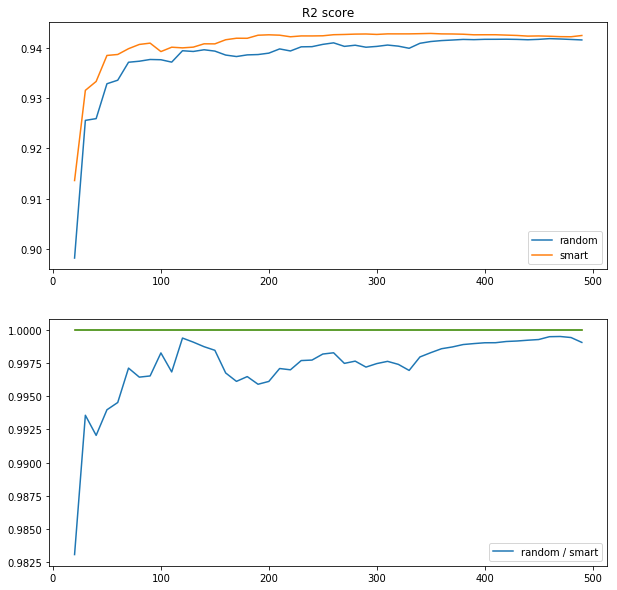

In [143]:
smart_agent = Agent('stat_volume')
random_agent = Agent('random')

agents = {'random': random_agent,
            'smart': smart_agent,
         }

scores = pd.DataFrame()
for i in range(500):
    ind = np.random.randint(S.shape[0], size=4)
    for agent_name, agent in agents.items():
#         print(i, agent_name)
        phi, r = agent.choose_phi(S[ind], R[ind])
        if i > 10 and i%10 == 0:
            agent.fit()
            r2, mse = agent.evaluate(S_test, R_test)
            scores.at[i, agent_name] = r2
scores
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
for agent_name in agents:
    ax[0].plot(scores[agent_name], label=agent_name)
ax[0].set_title('R2 score')
ax[0].legend()

ax[1].plot(scores['random'] / scores['smart'], label = 'random / smart')    
ax[1].plot(scores*0 + 1)   
# ax[0].title('R2 score')
ax[1].legend()
plt.show()

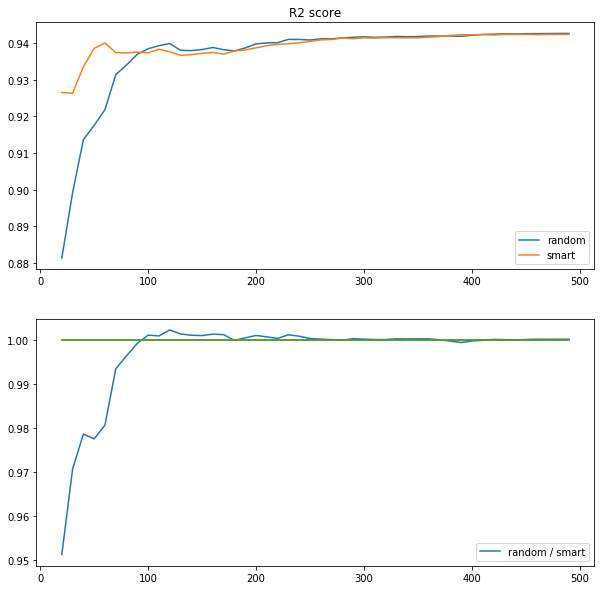

In [144]:
smart_agent = Agent('stat_volume')
random_agent = Agent('random')

agents = {'random': random_agent,
            'smart': smart_agent,
         }

scores = pd.DataFrame()
for i in range(500):
    ind = np.random.randint(S.shape[0], size=4)
    for agent_name, agent in agents.items():
#         print(i, agent_name)
        phi, r = agent.choose_phi(S[ind], R[ind])
        if i > 10 and i%10 == 0:
            agent.fit()
            r2, mse = agent.evaluate(S_test, R_test)
            scores.at[i, agent_name] = r2
scores
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
for agent_name in agents:
    ax[0].plot(scores[agent_name], label=agent_name)
ax[0].set_title('R2 score')
ax[0].legend()

ax[1].plot(scores['random'] / scores['smart'], label = 'random / smart')    
ax[1].plot(scores*0 + 1)   
# ax[0].title('R2 score')
ax[1].legend()
plt.show()

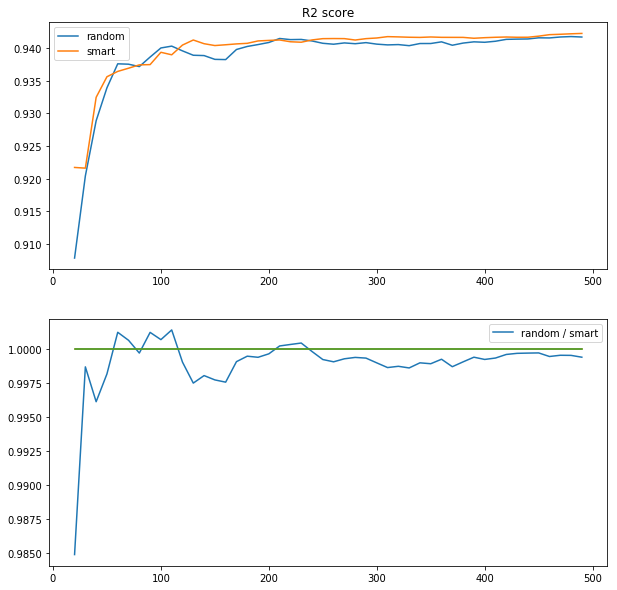

In [145]:
smart_agent = Agent('stat_volume')
random_agent = Agent('random')

agents = {'random': random_agent,
            'smart': smart_agent,
         }

scores = pd.DataFrame()
for i in range(500):
    ind = np.random.randint(S.shape[0], size=4)
    for agent_name, agent in agents.items():
#         print(i, agent_name)
        phi, r = agent.choose_phi(S[ind], R[ind])
        if i > 10 and i%10 == 0:
            agent.fit()
            r2, mse = agent.evaluate(S_test, R_test)
            scores.at[i, agent_name] = r2
scores
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
for agent_name in agents:
    ax[0].plot(scores[agent_name], label=agent_name)
ax[0].set_title('R2 score')
ax[0].legend()

ax[1].plot(scores['random'] / scores['smart'], label = 'random / smart')    
ax[1].plot(scores*0 + 1)   
# ax[0].title('R2 score')
ax[1].legend()
plt.show()

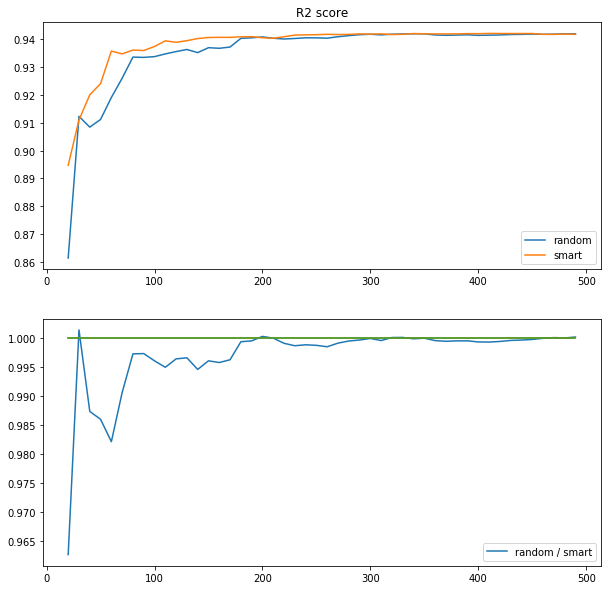

In [146]:
smart_agent = Agent('stat_volume')
random_agent = Agent('random')

agents = {'random': random_agent,
            'smart': smart_agent,
         }

scores = pd.DataFrame()
for i in range(500):
    ind = np.random.randint(S.shape[0], size=4)
    for agent_name, agent in agents.items():
#         print(i, agent_name)
        phi, r = agent.choose_phi(S[ind], R[ind])
        if i > 10 and i%10 == 0:
            agent.fit()
            r2, mse = agent.evaluate(S_test, R_test)
            scores.at[i, agent_name] = r2
scores
fig, ax = plt.subplots(nrows=2, figsize=(10, 10))
for agent_name in agents:
    ax[0].plot(scores[agent_name], label=agent_name)
ax[0].set_title('R2 score')
ax[0].legend()

ax[1].plot(scores['random'] / scores['smart'], label = 'random / smart')    
ax[1].plot(scores*0 + 1)   
# ax[0].title('R2 score')
ax[1].legend()
plt.show()

In [98]:
scores

,smart,random
0,0.073787,0.009010
1,0.103978,0.263832
2,0.675810,0.341641
3,0.548269,0.404120
4,0.457308,0.401996
5,0.323538,0.473877
6,-0.688576,0.573388
7,-12.580280,0.637192
8,-26.154818,0.755548
9,-89.147737,0.737222
